# Salerno et al (2016) stree profile


This notebook reproduces the R1-R1 model as shown in Figure 3.(d,f) of Salerno, V. M., F. A. Capitanio,
R. J. Farrington, and N. Riel (2016), The role of long-term rifting history on modes of continental lithosphere extension, J. Geophys. Res. Solid Earth, 121, (doi:10.1002/2016JB013005.

From Karato & Wu (1993) Science, we have the (probable) rheology of the upper mantle dominated by polycrystalline olivine. At steady state, the strain rate ($\dot\epsilon$) of rocks depends on temperature ($T$), pressure ($P$), grain size ($d$), and shear stress ($\sigma$) as

$$ \dot\epsilon = A (\sigma/\mu)^n (b/d)^m exp[-(E + PV)/RT] $$

where $A$ is the presxponential factor, $\mu$ is the shear modulus ($\approx 80$ GPa), $b$ is the length of the Burgers vector ($\approx 0.5 nm$), $n$ is the stress exponent, $m$ is the grain-size exponent, $E$ is the activation energy, $V$ is the activation volume, and $R$ is the gas constant.

In the work of Salerno et al (2016), dependence on grain size and pressure were discounted. Thus reducing the above to 

$$ \dot\epsilon = A (\sigma/\mu)^n exp[-E/RT] $$

The effective viscosity can then be calculated using 

$$ \mu_{eff} = A^{-1/n} \dot\epsilon^{1-n/n} exp[E/nRT] $$

In [1]:
import UWGeodynamics as GEO
import glucifer

import math
import numpy as np
import matplotlib.pyplot as plt


loaded rc file /opt/UWGeodynamics/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
u = GEO.UnitRegistry

**Define the Temperature profile**

In [3]:
T0 = 273.15  * u.kelvin # surface temperature
Qm = 30.0e-3 * u.watt / u.meter**2  # heat flux from mantle
Hr = 1.2e-6  * u.watt / u.meter**3  # crustal radiogenic heat production,
h  = 30.0    * u.kilometer  # crustal thickness
H  = 70.0    * u.kilometer  # lithospheric crustal thickness
a  = h+H 
k  = 2.6     * u.watt / u.meter / u.kelvin  # thermal conductivity
kappa  = 1.0e-6  * u.meter**2 / u.second        # thermal diffusivity

In [4]:
npoints = 120 # This is the number of points used to define the surface
depth   = np.linspace(0., 120., npoints) * u.kilometer
T       = np.zeros(120) * u.kelvin
density = np.linspace(0., 120., npoints) * u.kilogram / u.meter**3
A       = np.linspace(0., 120., npoints) 
n       = np.linspace(0., 120., npoints) 
E       = np.linspace(0., 120., npoints) * u.kilojoule/u.mole


In [26]:
# E

In [5]:
for i, y in enumerate(depth):
    Tc_max = T0 + ((Qm + Hr*h)/k)*h-(Hr/(2.*k))*h**2
    if y < 15.0 * u.kilometer:
        density[i] = 2700 * u.kilogram / u.meter**3
        T[i]     = T0 + ((Qm + Hr*h)/k)*y-(Hr/(2.*k))*y**2
        A[i]     = 1.1e-4
        n[i]     = 4.0
        E[i]     = 223.* u.kilojoule/u.mole
    elif y < 30.0 * u.kilometer:
        density[i] = 2900 * u.kilogram / u.meter**3
        T[i]     = T0 + ((Qm + Hr*h)/k)*y-(Hr/(2.*k))*y**2
        A[i]     = 190.0
        n[i]     = 4.7        
        E[i]     = 484.* u.kilojoule/u.mole
    elif y < 100.0 * u.kilometer:
        density[i] = 3300 * u.kilogram / u.meter**3
        T[i]     = Tc_max + (Qm/k)*(y-h)
        A[i]     = 4.5
        n[i]     = 2.6
        E[i]     = 535.* u.kilojoule/u.mole
    else:
        T[i]     = 1573.15 * u.degK
        density[i] = 3300 * u.kilogram / u.meter**3
        A[i]     = 4.5
        n[i]     = 2.6
        E[i]     = 535.* u.kilojoule/u.mole
    if T[i] > 1573.15 * u.degK:
        T[i] = 1573.15 * u.degK

**Discussion re Salerno 2016 rheology parameters**

In [6]:
rh = GEO.ViscousCreepRegistry()
pl = GEO.PlasticityRegistry()

In [7]:
# rh.Gleason_and_Tullis_1995

In [8]:
#rh.Mackwell_et_al_1998

**Need to fix!**

A_LC = 190.0e+0*u.megapascal**-4.7/u.seconds  = 1.1988189545123645e-26 / pascal ** 4.7 / second
does not match the Machwell et al 1998 of 5.77904e-27 / pascal ** 4.7 / second **

In [9]:
A_UC =   1.1e-4 / (u.megapascal**4.0) / u.seconds
A_LC = 190.0e+0 / (u.megapascal**4.7) / u.seconds 
A_LM =   4.5e+0 / (u.megapascal**3.6) / u.seconds 
print (A_UC)
print (A_LC)
print (A_LM)

0.00011 / megapascal ** 4 / second
190.0 / megapascal ** 4.7 / second
4.5 / megapascal ** 3.6 / second


In [10]:
print (A_UC.to(u.pascal**-4.0/u.second))
print (A_LC.to(u.pascal**-4.7/u.second))
print (A_LM.to(u.pascal**-3.6/u.second))


1.1e-28 / pascal ** 4 / second
1.1988189545123645e-26 / pascal ** 4.7 / second
1.1303488941793095e-21 / pascal ** 3.6 / second


In [11]:
A_LC_Mackwell = 5.77904e-27 / u.pascal ** 4.7 / u.second
A_LC_Mackwell.to(u.megapascal**-4.7/u.second)

<Quantity(91.59161154960496, '1 / megapascal ** 4.7 / second')>

**Define viscous creep and plasticity relationships**

In [13]:
# 1. upper crust - wet quartzite [Gleason and Tullis, 1995], 
# 2. lower crust - wet diabase   [Mackwell et al., 1998], 
# 3. mantle      - dry olivine   [Chopra and Paterson, 1981].
# n = np.array([  4.0e+0,   4.7,   2.6])#  nondimensional
# A = np.array([  1.1e-4, 190.0,   4.5])#* u.megapascal**-n/u.second
# E = np.array([223.0e+0, 485.0, 535.0])# * u.kilojoule/u.mole

In [14]:
# A5 strain rate 
epsDot = 1.0e-15 / u.second

In [15]:
R = 8.314 * u.joule / u.mole / u.kelvin 
g        = 9.81 * u.meter / u.second**2
cohesion = 60. * u.megapascal # cohesion
friction = math.atan(0.6)                # friction coefficient
P        = density * g * depth

yieldStress    = (cohesion * math.cos(friction) + P * math.sin(friction))
yieldViscosity =  0.5 * yieldStress / epsDot

# From Louis' examples
# yieldStress = cohesion + friction * pressureField  !!!! I am here !!!
# yieldingViscosityFn =  0.5 * yieldStress / epsDot
# viscosityFn = fn.exception.SafeMaths( fn.misc.max(fn.misc.min(yieldingViscosityFn, 
#                                                               backgroundViscosityFn), 
#                                                   min_viscosity))

In [17]:
# A**(-1./n), A, n

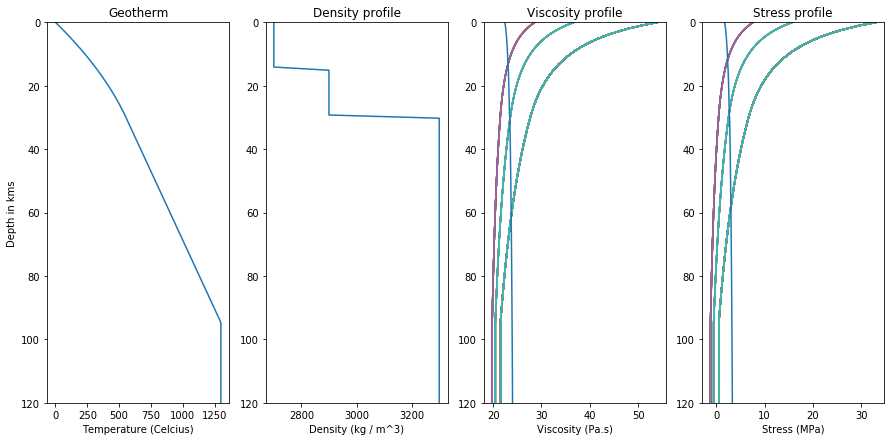

In [34]:
Fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(15,7))

ax1.plot(T.to(u.degC), depth.to(u.kilometer))
ax1.set_xlabel("Temperature (Celcius)")
ax1.set_ylabel("Depth in kms")
ax1.set_ylim(120,0)
ax1.set_title("Geotherm")

ax2.plot(density, depth.to(u.kilometer))
ax2.set_xlabel("Density (kg / m^3)")
#ax2.set_ylabel("Depth in kms")
ax2.set_ylim(120,0)
ax2.set_title("Density profile")

# viscousCreep  = (0.5*A**(-1./n) * u.megapascal * u.second**(1./n))
# viscousCreep *= np.power(epsDot,(1-n)/n) * u.second**((-1.+n)/n)
# viscousCreep *= np.exp((E/(n*T*R)))
viscousCreep  = 0.5*A**(-1./n)
viscousCreep *= np.power(epsDot,(1-n)/n) 
viscousCreep *= np.exp((E/(n*T*R)))
viscousCreep *= u.pascal * u.second

for i, x in enumerate(A):
    viscousCreep  = 0.5*np.power(A[i],(-1./n[i])) * u.megapascal * u.second**(1./n[i])
    viscousCreep *= np.power(epsDot,(1-n[i])/n[i]) * u.second**((-1.+n[i])/n[i])
    viscousCreep *= np.exp((E[i]/(n[i]*T*R)))

    ax3.plot(np.log10(viscousCreep.to(u.pascal*u.second).magnitude), depth.to(u.kilometer))

    stress  = viscousCreep * epsDot 
    ax4.plot(np.log10(stress.to(u.megapascal).magnitude), depth.to(u.kilometer))
    #     set max & min viscosity - no need we have plasticity
    #viscousCreepPlot = np.min(viscousCreep, yieldViscosity)
# ax3.plot(np.log10(viscousCreep.to(u.pascal*u.second).magnitude), depth.to(u.kilometer))
# ax3.plot(np.log10(yieldViscosity.to(u.pascal*u.second).magnitude), depth.to(u.kilometer))


# ax3.plot(np.log10(viscousCreep.to(u.pascal*u.second).magnitude), depth.to(u.kilometer))
ax3.plot(np.log10(yieldViscosity.to(u.pascal*u.second).magnitude), depth.to(u.kilometer))


#stress  = viscousCreep * epsDot 
#ax4.plot((stress.to(u.megapascal).magnitude), depth.to(u.kilometer))
ax4.plot(np.log10(yieldStress.to(u.megapascal).magnitude), depth.to(u.kilometer))

ax3.set_xlabel("Viscosity (Pa.s)")
#ax3.set_ylabel("Depth in kms")
ax3.set_ylim(120,0)
ax3.set_title("Viscosity profile")
#ax3.set_xlim(19., 25.)
         
ax4.set_xlabel("Stress (MPa)")
#ax4.set_ylabel("Depth in kms")
ax4.set_title("Stress profile")
ax4.set_ylim(120,0)
#ax4.set_xlim(0, 1200)

plt.show()
Fig.show()


In [ ]:
min(0.5*np.power(A,(-1./n)))

**This shouldn't be dimensionless**
1. sort this out.
2. plot Salerno et al parameters
3. plot Tutorial_1_ThermoMechanical_model parameters
4. plot other vairables.
